### LAB 2: Use Generative AI To Support Advanced Data Analytics 

### Task 1: EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('wine_reviews_user.zip')
print("Dataset loaded successfully. Shape:", df.shape)
df.head()

Dataset loaded successfully. Shape: (432659, 13)


,Name,Variety,Origin,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price
0,M. Chapoutier La Combe Pilate Esteban Brut Nat...,Vintage Sparkling Wine,"Rhone, France",Sparkling & Champagne,Green Wine,750.0,10.0,NaN,NaN,5.0,15.0,49.99,NaN
1,Vinos de Arganza Alvarez de Toledo Godello 2020,Godello,Spain,White Wine,NaN,750.0,0.0,This wine has a bright yellow color with fresh...,NaN,5.0,13.0,10.99,NaN
2,Louis Latour Vosne-Romanee 2019,Pinot Noir,"Vosne-Romanee, Cote de Nuits, Cote d'Or, Burgu...",Red Wine,Boutique,750.0,0.0,NaN,"Toasty, spicy aromas introduce this rich, silk...",5.0,20.0,114.99,119.99
3,Chateau Bouscaut 2020,Bordeaux Red Blends,"Pessac-Leognan, Bordeaux, France",Red Wine,NaN,750.0,14.5,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...,5.0,17.0,44.99,NaN
4,Brandini Barolo La Morra 2015,Nebbiolo,"Barolo, Piedmont, Italy",Red Wine,Green Wine,750.0,14.0,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ...",5.0,19.0,85.99,63.99


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432659 entries, 0 to 432658
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Name                430834 non-null  object 
 1   Variety             421041 non-null  object 
 2   Origin              421017 non-null  object 
 3   Attr_1              427541 non-null  object 
 4   Attr_2              78506 non-null   object 
 5   Alcohol_vol         430767 non-null  float64
 6   Alcohol_percentage  430767 non-null  float64
 7   Winemaker_notes     98427 non-null   object 
 8   Review              95748 non-null   object 
 9   Avg_rating          46547 non-null   float64
 10  N_ratings           46547 non-null   float64
 11  Price_Out-of-stock  430766 non-null  object 
 12  Price               91226 non-null   object 
dtypes: float64(4), object(9)
memory usage: 42.9+ MB


Name                    1825
Variety                11618
Origin                 11642
Attr_1                  5118
Attr_2                354153
Alcohol_vol             1892
Alcohol_percentage      1892
Winemaker_notes       334232
Review                336911
Avg_rating            386112
N_ratings             386112
Price_Out-of-stock      1893
Price                 341433
dtype: int64

In [4]:
import re
import numpy as np

def extract_price(price_string):
    """
    Extracts a valid numeric price (integer or float) from a string.
    """
    if not isinstance(price_string, str):
        return np.nan

    match = re.search(r'(\d+\.?\d*)', price_string)

    if match:
        try:
            return float(match.group(0))
        except ValueError:
            return np.nan
    else:
        return np.nan

In [5]:
df['price_cleaned'] = df['Price'].apply(extract_price)
df['price_out_of_stock_cleaned'] = df['Price_Out-of-stock'].apply(extract_price)
df['temp_price'] = df['price_cleaned'].combine_first(df['price_out_of_stock_cleaned'])

# check extraction
print("Original Price vs. Cleaned Price:")
print(df[['Price', 'price_cleaned', 'Price_Out-of-stock', 'price_out_of_stock_cleaned', 'temp_price']].sample(10))

# check data type
print("\nData types of new price columns:")
print(df[['price_cleaned', 'price_out_of_stock_cleaned', 'temp_price']].dtypes)

Original Price vs. Cleaned Price:
        Price  price_cleaned Price_Out-of-stock  price_out_of_stock_cleaned  \
108711    NaN            NaN              33.99                       33.99   
189321    NaN            NaN              17.99                       17.99   
320384    NaN            NaN              14.99                       14.99   
69505     NaN            NaN              11.99                       11.99   
57720   26.99          26.99              29.99                       29.99   
265816    NaN            NaN               9.99                        9.99   
107208    NaN            NaN             507.99                      507.99   
49323     NaN            NaN              99.00                       99.00   
48955     NaN            NaN             159.97                      159.97   
222851    NaN            NaN              94.99                       94.99   

        temp_price  
108711       33.99  
189321       17.99  
320384       14.99  
69505       

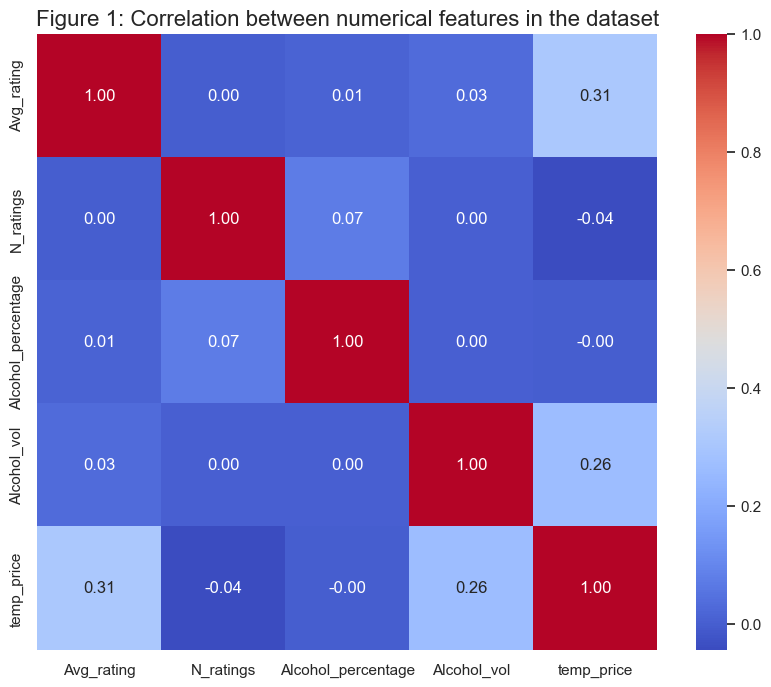

In [6]:
# --- Figure 1  ---
numerical_cols_for_corr = ['Avg_rating', 'N_ratings', 'Alcohol_percentage', 'Alcohol_vol', 'temp_price']
correlation_matrix = df[numerical_cols_for_corr].corr()

# Create the heatmap
plt.figure(figsize=(10, 8)) # Optional: Adjust the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Figure 1: Correlation between numerical features in the dataset', fontsize=16)
plt.show()

The correlation between Avg_rating and temp_price is 0.31, indicating a weak positive relationship. This supports the hypothesis that wine price is not strongly driven by ratings alone, but by other subjective factors.

In [7]:
print(df['Origin'])

0                                             Rhone, France
1                                                     Spain
2         Vosne-Romanee, Cote de Nuits, Cote d'Or, Burgu...
3                          Pessac-Leognan, Bordeaux, France
4                                   Barolo, Piedmont, Italy
                                ...                        
432654     Eden Valley, Barossa, South Australia, Australia
432655                              Barolo, Piedmont, Italy
432656                                   Mendoza, Argentina
432657                                       Tuscany, Italy
432658                             Marlborough, New Zealand
Name: Origin, Length: 432659, dtype: object


In [8]:
df['Country'] = df['Origin'].fillna('').str.split(',').str[-1].str.strip()

# --- us_states from Gemini ---
us_states_and_abbrevs = {
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
    'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
    'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
    'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
    'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
    'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE',
    'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI',
    'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
}

state_mapping = {state: 'United States' for state in us_states_and_abbrevs}

df['Country'] = df['Country'].replace(state_mapping)
# change 'Other U.S.' into 'United States'
df['Country'] = df['Country'].replace('Other U.S.', 'United States')

all_country_counts = df['Country'].value_counts()
valid_country_counts = all_country_counts[all_country_counts.index != '']
top_10_valid_countries = valid_country_counts.head(10)
#print(top_10_valid_countries)

Country
United States    162486
France            88550
Italy             64589
Spain             25602
Australia         18636
Argentina         11401
South Africa      10084
Chile              9434
New Zealand        7790
Portugal           6373
Name: count, dtype: int64


C:\Users\Yang\AppData\Local\Temp\ipykernel_47088\2877544443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_valid_countries.values, y=top_10_valid_countries.index, palette='viridis')


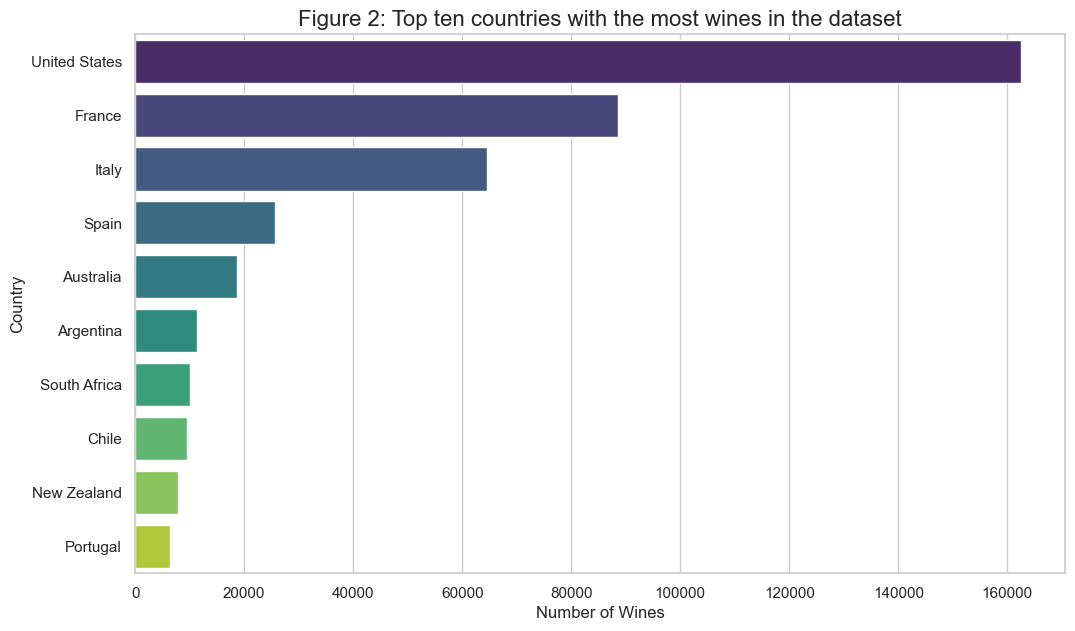

In [9]:
# --- Figure 2 ---
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_valid_countries.values, y=top_10_valid_countries.index, palette='viridis')
plt.title('Figure 2: Top ten countries with the most wines in the dataset', fontsize=16)
plt.xlabel('Number of Wines', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

The dataset is dominated by wines from the United States, France, and Italy. The "United States" category was consolidated from various state names, highlighting the importance of data cleaning for accurate geographical analysis.

C:\Users\Yang\AppData\Local\Temp\ipykernel_47088\3914794815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_varieties.values, y=top_10_varieties.index, palette='viridis')


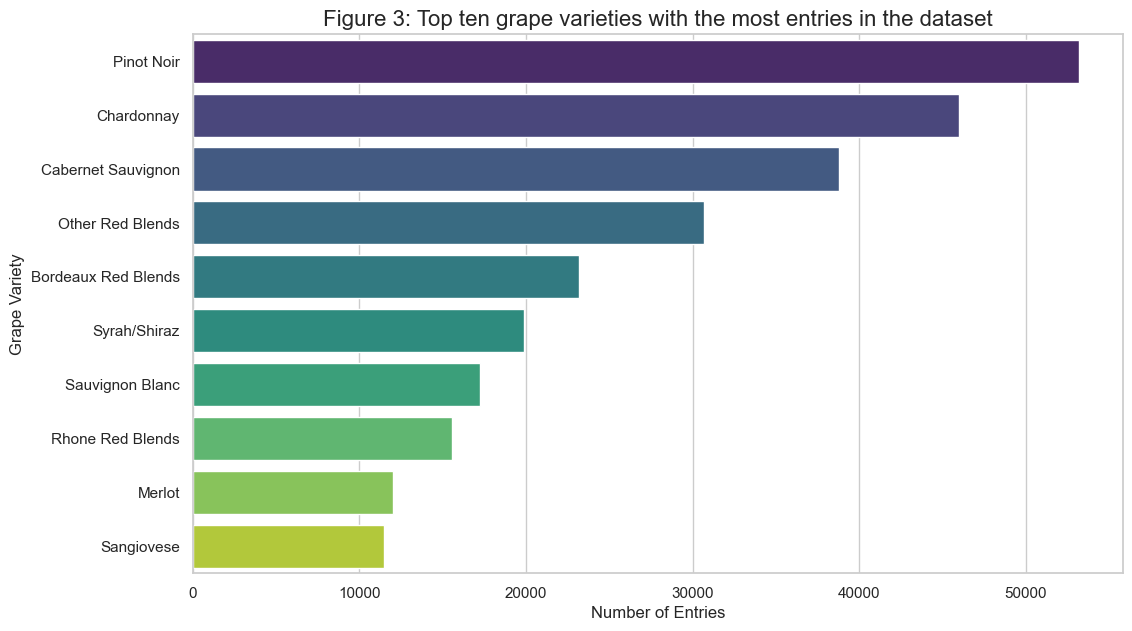

In [10]:
# --- Figure 3 ---
plt.figure(figsize=(12, 7))
top_10_varieties = df['Variety'].value_counts().head(10)
sns.barplot(x=top_10_varieties.values, y=top_10_varieties.index, palette='viridis')
plt.title('Figure 3: Top ten grape varieties with the most entries in the dataset', fontsize=16)
plt.xlabel('Number of Entries', fontsize=12)
plt.ylabel('Grape Variety', fontsize=12)
plt.show()

Pinot Noir, Chardonnay, and Cabernet Sauvignon are the most common grape varieties. This reflects a focus on popular, commercially significant wines within the dataset.

C:\Users\Yang\AppData\Local\Temp\ipykernel_47088\81667888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


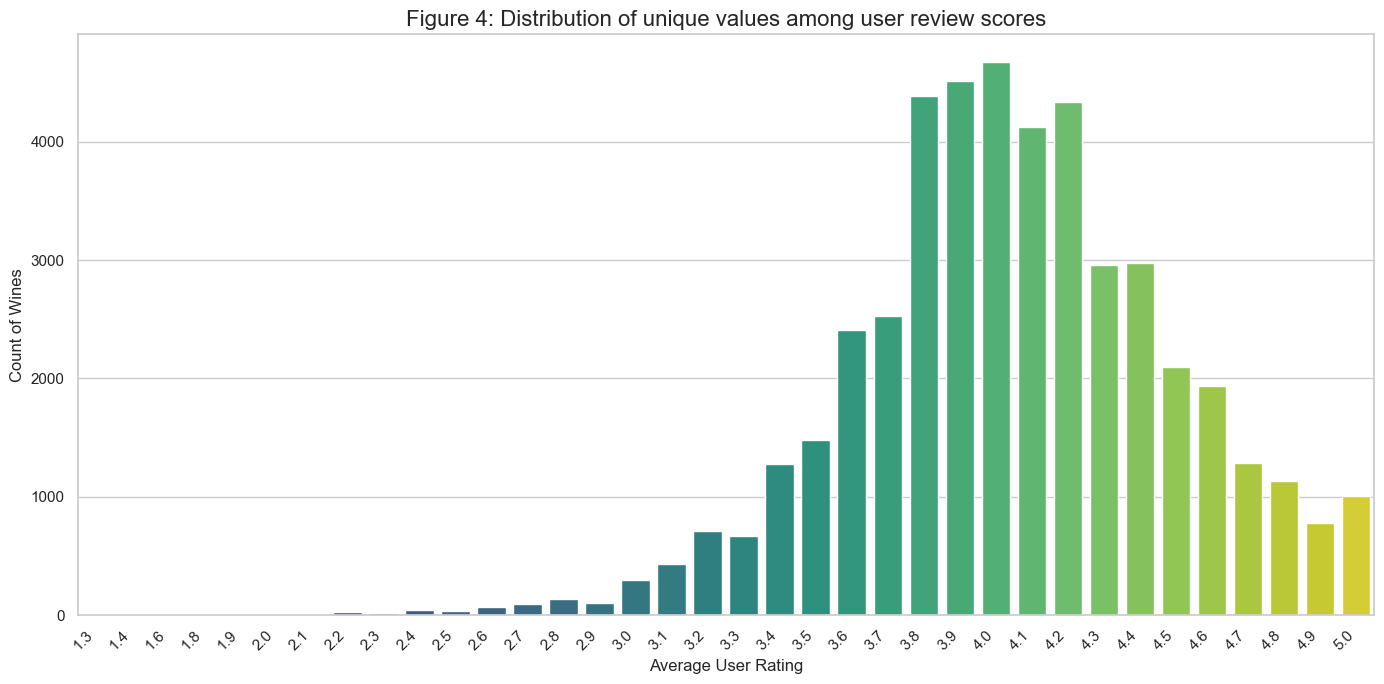

In [11]:
# --- Figure 4 ---

ratings_data = df['Avg_rating'].dropna()
plt.figure(figsize=(14, 7))
sns.countplot(
    x=ratings_data, 
    order=sorted(ratings_data.unique()), 
    palette='viridis'                   
)

plt.title('Figure 4: Distribution of unique values among user review scores', fontsize=16)
plt.xlabel('Average User Rating', fontsize=12)
plt.ylabel('Count of Wines', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

The distribution is heavily left-skewed, with the vast majority of wines receiving high scores. This indicates a strong positive rating bias on the platform. The most frequent ratings are clustered between 3.8 and 4.2, with the absolute peak occurring at 4.0.

C:\Users\Yang\AppData\Local\Temp\ipykernel_47088\1235841853.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_country.values, y=avg_rating_by_country.index, palette='viridis')


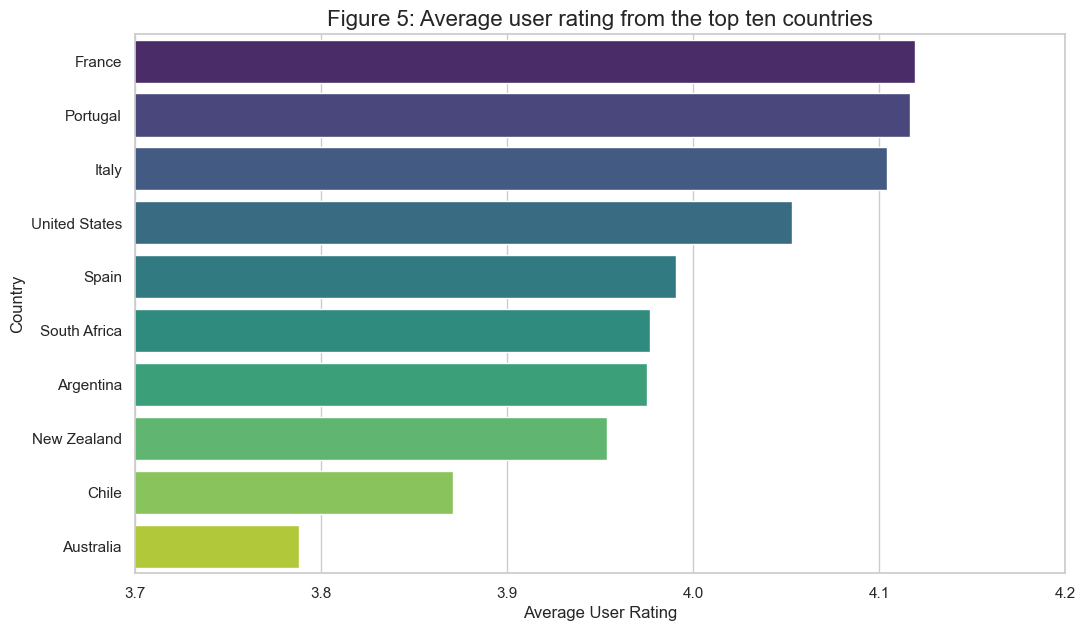

In [12]:
# --- Figure 5 ---
top_10_country_names = top_10_valid_countries.index
top_countries_data = df[df['Country'].isin(top_10_country_names)]
avg_rating_by_country = top_countries_data.groupby('Country')['Avg_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_rating_by_country.values, y=avg_rating_by_country.index, palette='viridis')
plt.title('Figure 5: Average user rating from the top ten countries', fontsize=16)
plt.xlabel('Average User Rating', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xlim(left=3.7) 
plt.xlim(right=4.2) 
plt.show()

While the United States leads in wine volume, countries like France and Italy have slightly higher average user ratings among the top producers. All top countries maintain high average scores, consistent with the overall rating distribution.

### Handover for Task 2: Data Cleaning & Feature Engineering

1.  **Price Cleaning**: I've created a robust function `extract_price()` in **Cell [4]** that handles converting the string-based `Price` and `Price-Out-of-stock` columns to numeric values. You can directly reuse this to create the final `Price_Feature`.

2.  **Origin/Country Cleaning**: The `Origin` column was quite messy. In **Cell [8]**, you'll find the complete logic I used to extract and clean the `Country` column. It correctly maps all U.S. states and "Other U.S." to "United States." You can build on this to extract the `Region` and `Zone` columns.

3.  **Other Finding**: The dataset has a massive number of nulls in `Avg_rating`, `Review`, and `Winemaker_notes`. Remember that we need to drop records without a `Review` as per the lab requirements.
